# 📊 E-commerce Sales Analysis: Superstore Dashboard
This notebook processes and prepares the Superstore dataset for visualization in Tableau. We’ll clean the data, create new features, and export a ready-to-use CSV for building a dashboard.


## 📌 Step 1: Import Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

## 📌 Step 2: Load the Dataset
Load the Superstore dataset CSV file.

In [12]:
file_path = 'Sample - Superstore.csv'  # Update if needed
df = pd.read_csv(file_path, encoding='ISO-8859-1')

## 📌 Step 3: Explore the Data
Take a quick look at the structure and summary of the dataset.

In [13]:
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

## 📌 Step 4: Clean the Data
Rename columns, convert dates, remove duplicates, and handle missing values.

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df = df.drop_duplicates()
print(df.isnull().sum())
df['postal_code'] = df['postal_code'].fillna(0)

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


## 📌 Step 5: Feature Engineering
Create new columns for analysis: monthly buckets and profit margin.

In [15]:
df['order_month'] = pd.to_datetime(df['order_date'].dt.to_period('M').astype(str))
df['profit_margin'] = df['profit'] / df['sales']
df['year'] = df['order_date'].dt.year

## 📌 Step 6: Export Data for Tableau
Save the cleaned and enriched dataset as a CSV file for use in Tableau.

In [19]:
df.to_csv('superstore_cleaned.csv', index=False)
print("✅ Data exported for Tableau: 'superstore_cleaned.csv'")

✅ Data exported for Tableau: 'superstore_cleaned.csv'


## 📌 (Optional) Step 7: Basic Visualizations in Python
Quick look at sales trends and top categories using matplotlib/seaborn.

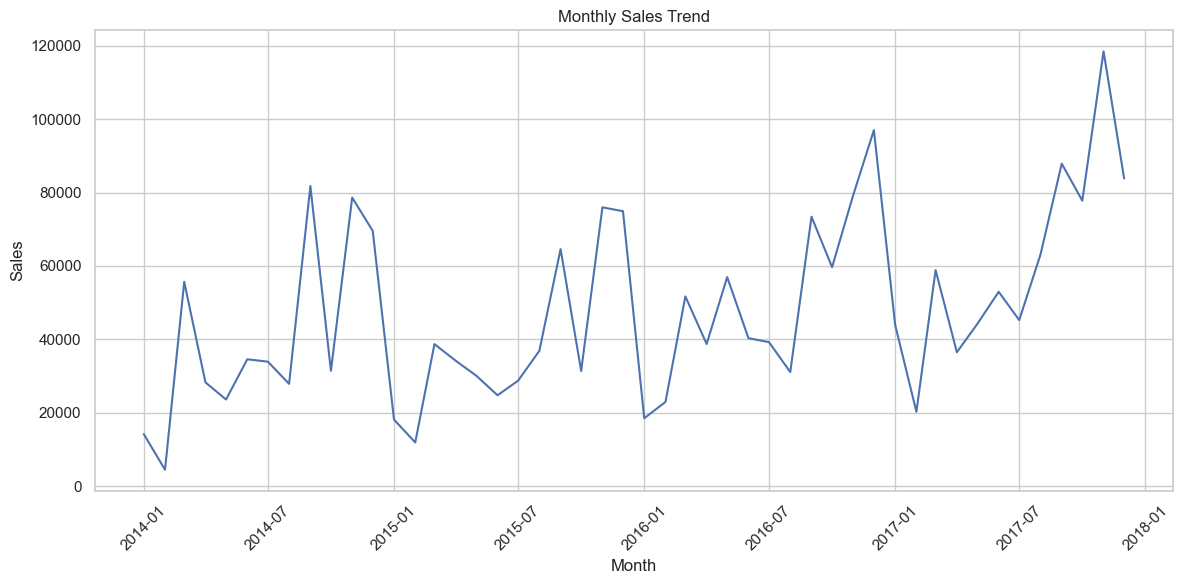

In [17]:
# Sales Over Time
monthly_sales = df.groupby('order_month')['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_month', y='sales')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

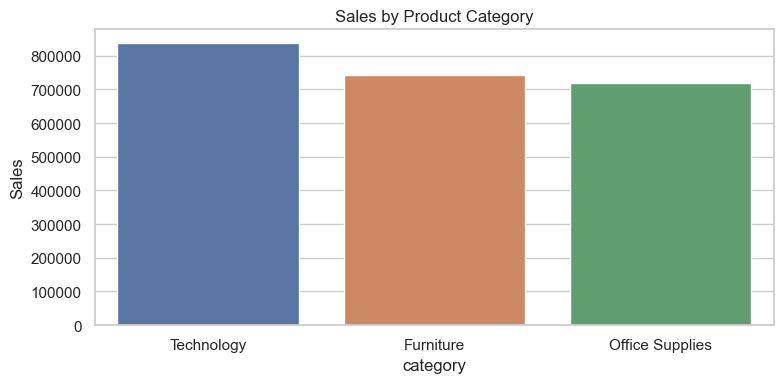

In [18]:
# Top Categories
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()